In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
#read files
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,20100104,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,20100105,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,20100106,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,20100107,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,20100108,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


In [3]:
df_sp.dtypes

gvkey             int64
iid               int64
datadate          int64
tic              object
cusip            object
conm             object
div             float64
divd            float64
dvrated         float64
divsppaydate    float64
curcdd           object
cshoc           float64
cshtrd          float64
eps             float64
prccd           float64
prchd           float64
prcld           float64
prcod           float64
prcstd          float64
exchg             int64
secstat          object
cik               int64
conml            object
naics             int64
sic               int64
spcindcd        float64
stko              int64
dtype: object

In [4]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [5]:
#length of the csv file
print("Length of the csv file:", len(df_sp))
print("Timeframe: From ", df_sp.datadate.min(), "---To ", df_sp.datadate.max())

Length of the csv file: 176222
Timeframe: From  2010-01-04 00:00:00 ---To  2021-12-03 00:00:00


In [49]:
print("Amount of tic: ", len(df_sp.tic.unique()), "--- Amount of tic NaN: " ,df_sp.tic.isnull().sum())
print("Amount of conm", len(df_sp.conm.unique()), "--- Amount of conm NaN: " ,df_sp.conm.isnull().sum())
print("----")
print("Amount of cusip: ", len(df_sp.cusip.unique()), "--- Amount of cusip NaN: " ,df_sp.cusip.isnull().sum())
print("Amount of gvkey: ", len(df_sp.gvkey.unique()), "--- Amount of gvkey NaN: " ,df_sp.gvkey.isnull().sum())
print("Amount of iid: ", len(df_sp.iid.unique()), "--- Amount of iid NaN: " ,df_sp.iid.isnull().sum())

Amount of tic:  82 --- Amount of tic NaN:  0
Amount of conm 51 --- Amount of conm NaN:  0
----
Amount of cusip:  82 --- Amount of cusip NaN:  0
Amount of gvkey:  51 --- Amount of gvkey NaN:  0
Amount of iid:  14 --- Amount of iid NaN:  0


In [50]:
print ("Amount of NaN: Closed price:", df_sp.prccd.isnull().sum())
print ("Amount of NaN: Open price:", df_sp.prcod.isnull().sum())
print ("Amount of NaN: Price High daily:", df_sp.prchd.isnull().sum())
print ("Amount of NaN: Low Daily price:", df_sp.prcld.isnull().sum())
print ("Amount of NaN: Standard deviation price:", df_sp.prcstd.isnull().sum())

Amount of NaN: Closed price: 5
Amount of NaN: Open price: 2637
Amount of NaN: Price High daily: 5
Amount of NaN: Low Daily price: 5
Amount of NaN: Standard deviation price: 5


In [43]:
df_sp.cusip.nunique()

82

In [40]:
# Amount of unique tics per Conm 
# 1 Conm -- n tic
# 1 tic - 1 conm
print(df_sp.groupby(df_sp["conm"])["tic"].nunique())
print ("Summe = " ,df_sp.groupby(df_sp["conm"])["tic"].nunique().sum())

conm
3M CO                           1
ABBOTT LABORATORIES             1
ABBVIE INC                      1
ABIOMED INC                     1
ACCENTURE PLC                   1
ACTIVISION BLIZZARD INC         1
ADOBE INC                       1
ADVANCE AUTO PARTS INC          1
ADVANCED MICRO DEVICES          1
AES CORP (THE)                  2
AFLAC INC                       1
AGILENT TECHNOLOGIES INC        1
AIR PRODUCTS & CHEMICALS INC    1
AKAMAI TECHNOLOGIES INC         1
ALASKA AIR GROUP INC            1
ALBEMARLE CORP                  1
ALEXANDRIA R E EQUITIES INC     4
ALIGN TECHNOLOGY INC            1
ALLEGION PLC                    1
ALLIANT ENERGY CORP             1
ALLSTATE CORP                   9
ALPHABET INC                    2
ALTRIA GROUP INC                1
AMAZON.COM INC                  1
AMCOR PLC                       2
AMEREN CORP                     1
AMERICAN AIRLINES GROUP INC     4
AMERICAN ELECTRIC POWER CO      4
AMERICAN EXPRESS CO             1
AMERICAN 

In [42]:
# unique tics and unique conm
print (df_sp.tic.unique())
print (df_sp.conm.unique())

['AAMRQ' 'AAR' 'AAL' 'AALCP' 'ABT' 'AMD' 'APD' 'ALK' 'AEP' 'AEP.PA'
 'AEPPL' 'AEPPZ' 'AXP' 'AFL' 'AIG' 'AIG.PA.1' 'AIG.WS' 'AIG.PA' 'AME'
 'AMGN' 'ADI' 'APA' 'APA.PD' 'AAPL' 'AMAT' 'ADM' 'ADM.PA' 'AON' 'AJG'
 'IBM' 'MMM' 'MO' '5050B' 'AOS' 'AEE' 'LNT' 'MSFT' 'ADBE' 'ABMD' 'APH'
 'ABBV' 'ANET' 'AES' 'AESC' 'ALL' 'ALL.PA' 'ALL.PC' 'ALL.PD' 'ALL.PE'
 'ALL.PF' 'ALL.PG' 'ALL.PH' 'ALL.PI' 'ALB' 'ABC' 'ANSS' 'AMZN' 'ARE'
 'ARE.PC' 'ARE.PD' 'ARE.PE' 'AMCR' 'AMCO30' 'AMT' 'AMT.PA' 'AMT.PB' 'APTV'
 'APTV.PA' 'AKAM' 'A' 'ALGN' 'ACN' 'ANTM' 'ANTX' 'AAP' 'GOOGL' 'GOOG'
 'AMP' 'AMP.PA' 'AWK' 'ATVI' 'ALLE']
['AMERICAN AIRLINES GROUP INC' 'ABBOTT LABORATORIES'
 'ADVANCED MICRO DEVICES' 'AIR PRODUCTS & CHEMICALS INC'
 'ALASKA AIR GROUP INC' 'AMERICAN ELECTRIC POWER CO' 'AMERICAN EXPRESS CO'
 'AFLAC INC' 'AMERICAN INTERNATIONAL GROUP' 'AMETEK INC' 'AMGEN INC'
 'ANALOG DEVICES' 'APA CORP' 'APPLE INC' 'APPLIED MATERIALS INC'
 'ARCHER-DANIELS-MIDLAND CO' 'AON PLC' 'ARTHUR J GALLAGHER & CO'
 'INTL BUSINESS 

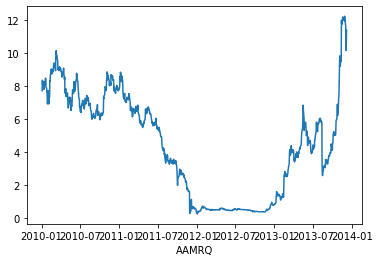

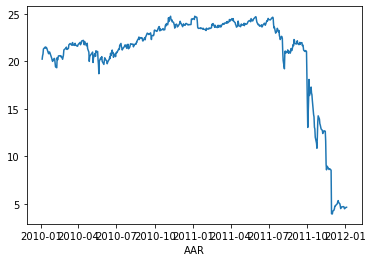

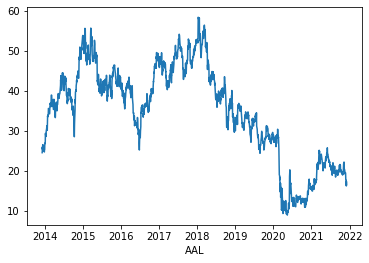

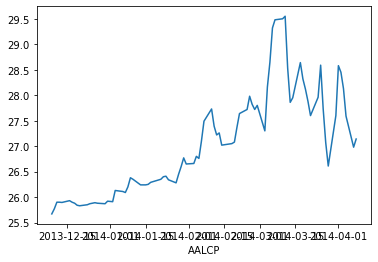

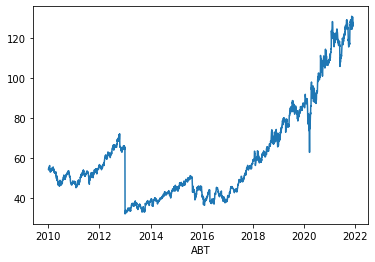

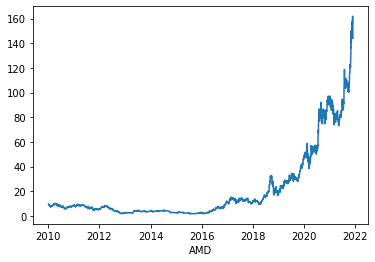

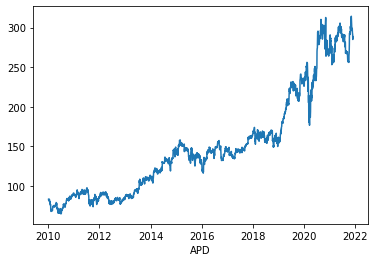

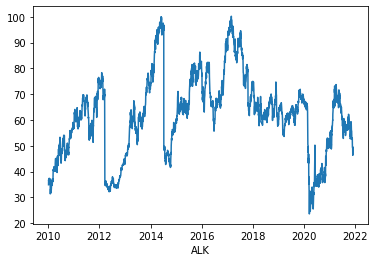

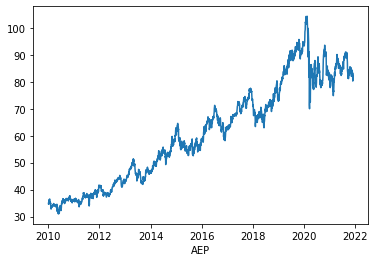

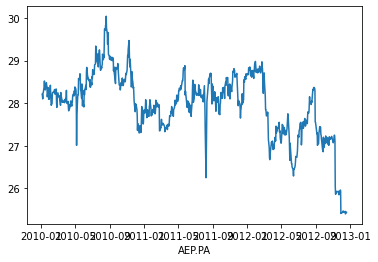

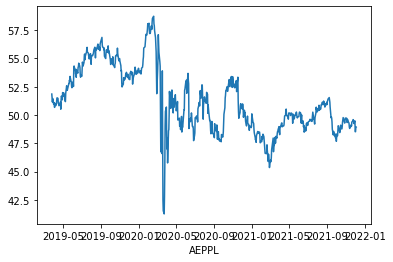

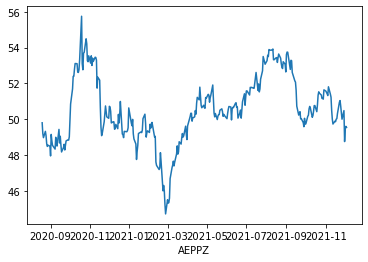

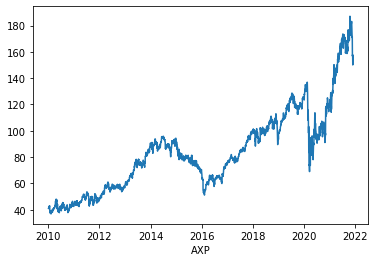

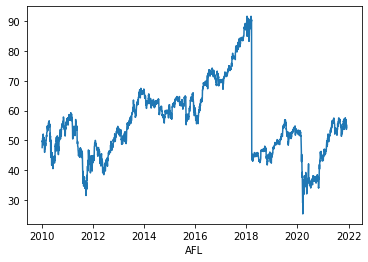

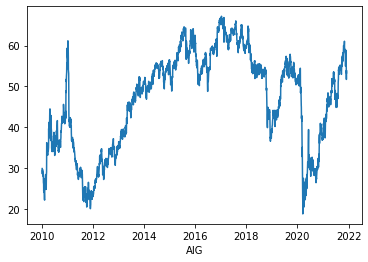

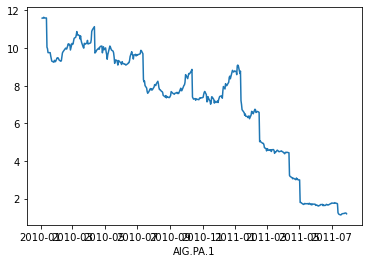

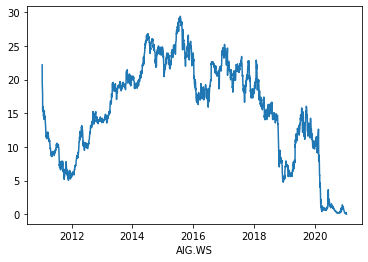

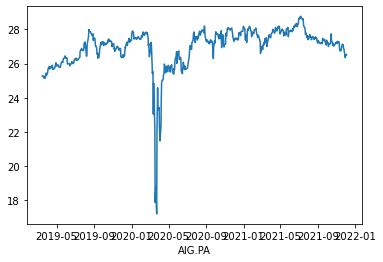

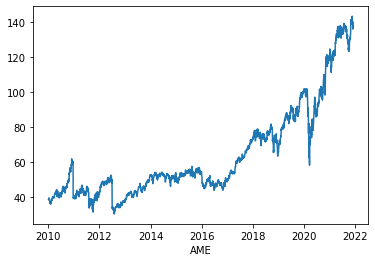

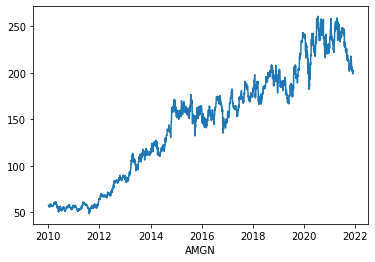

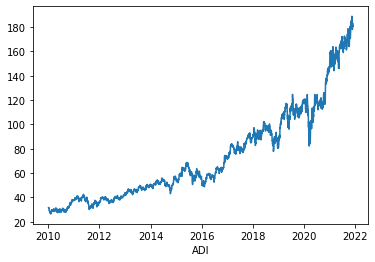

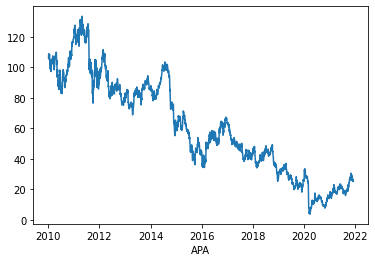

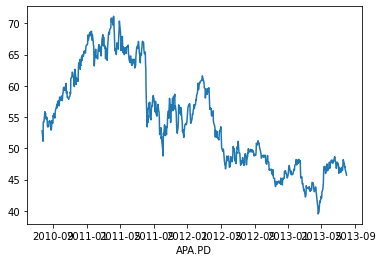

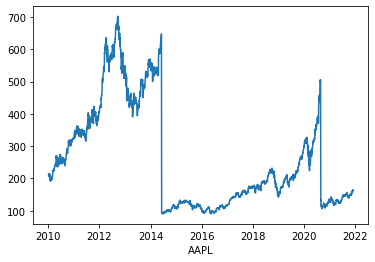

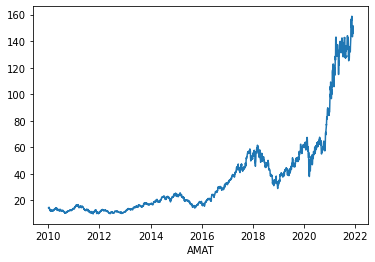

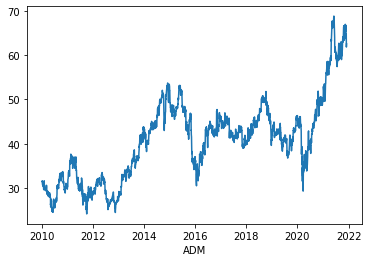

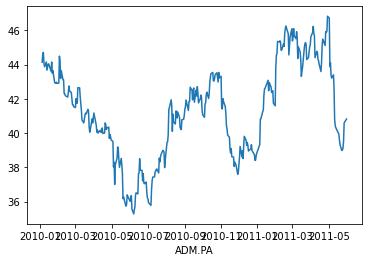

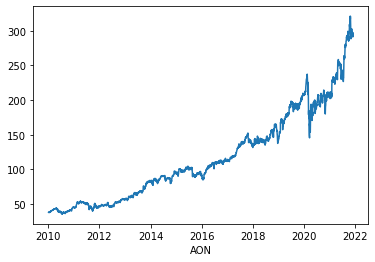

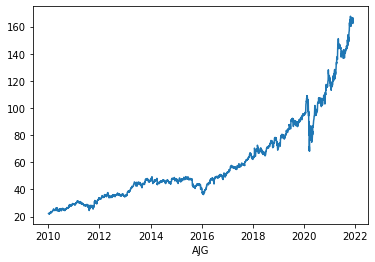

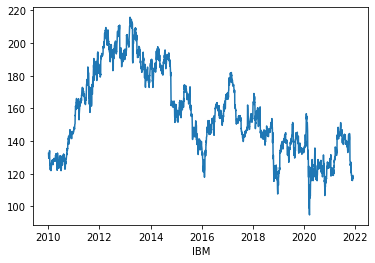

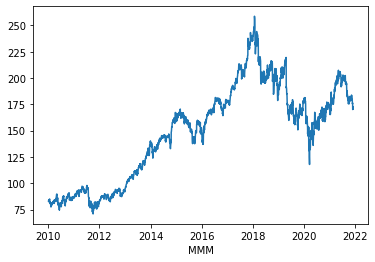

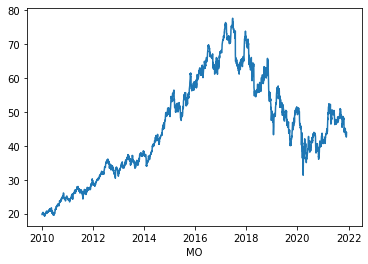

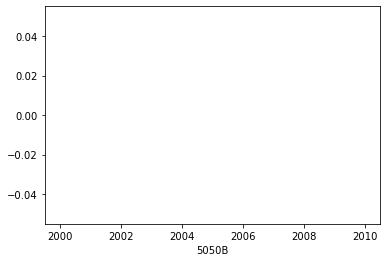

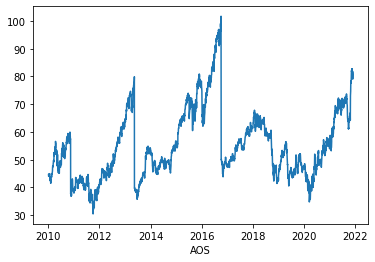

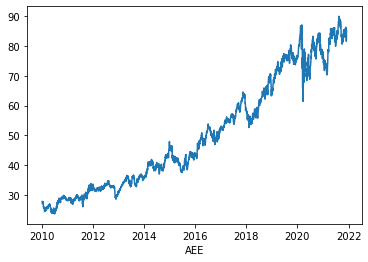

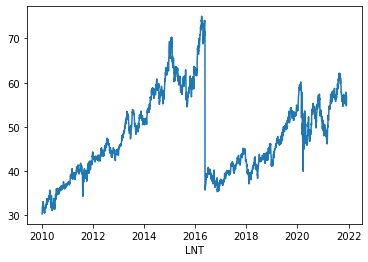

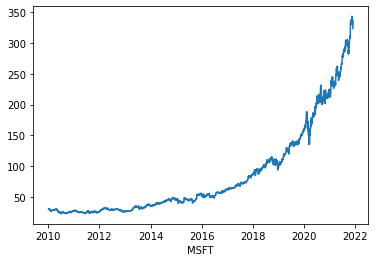

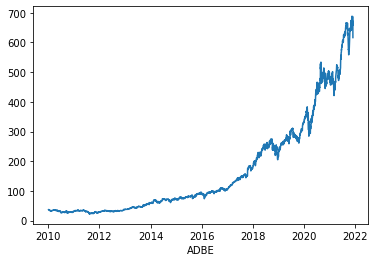

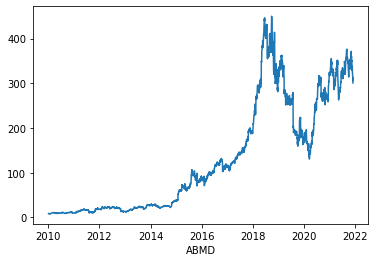

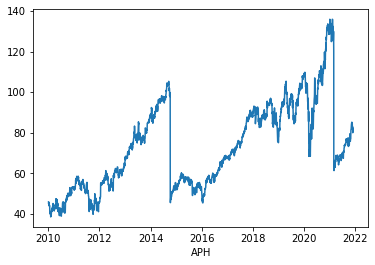

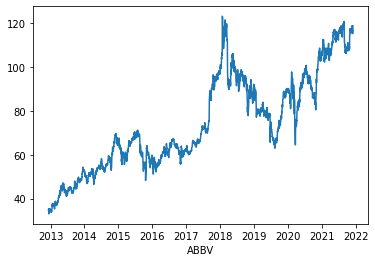

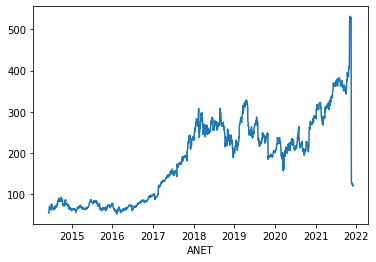

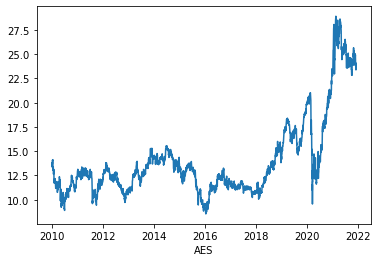

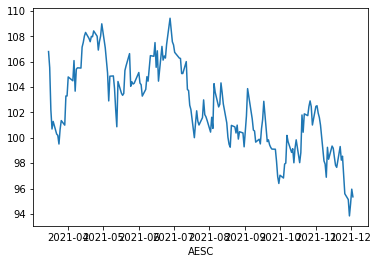

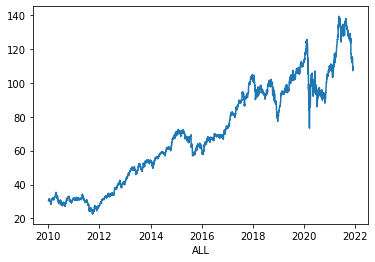

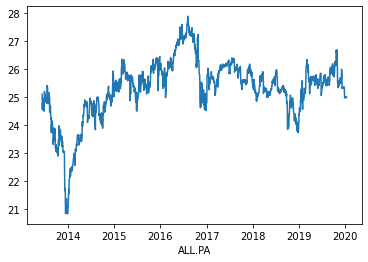

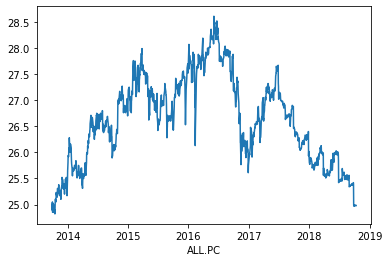

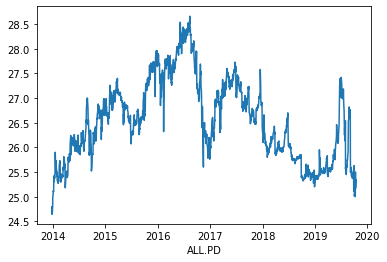

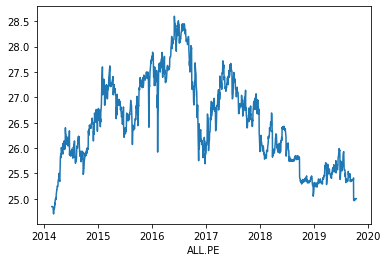

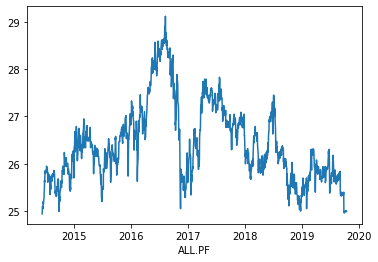

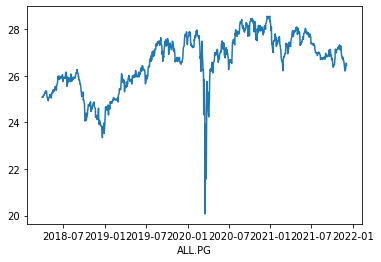

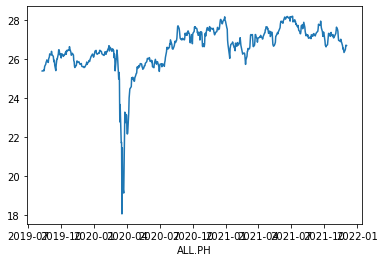

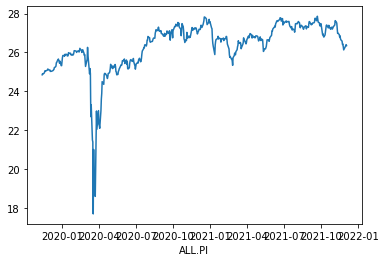

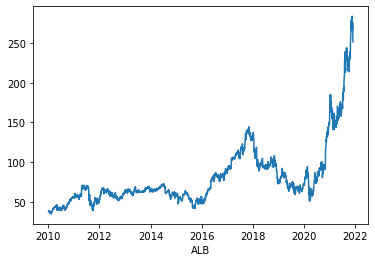

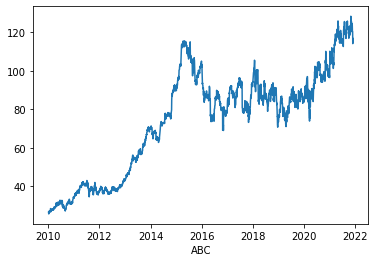

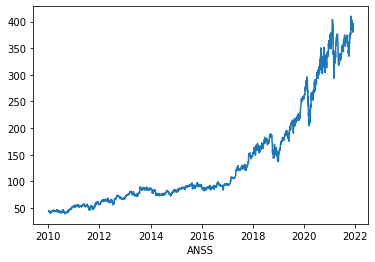

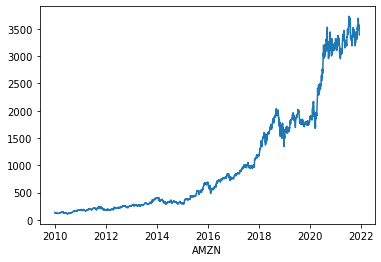

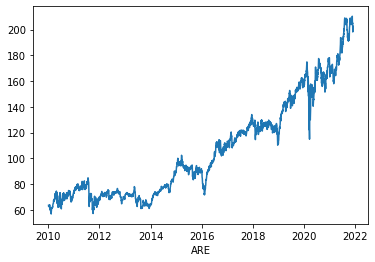

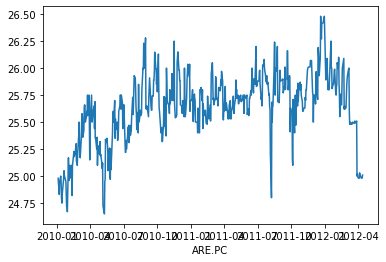

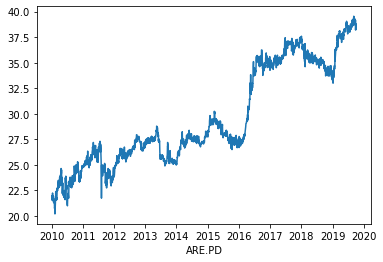

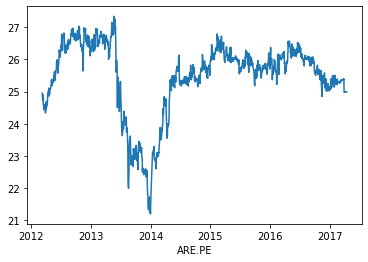

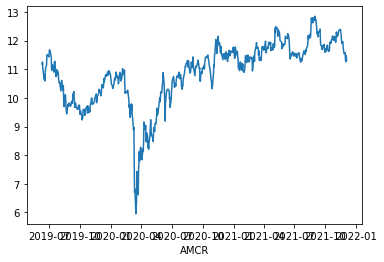

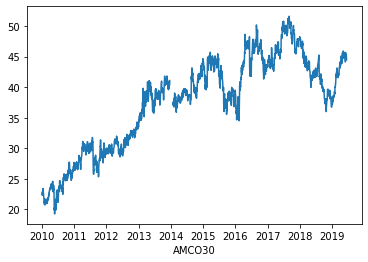

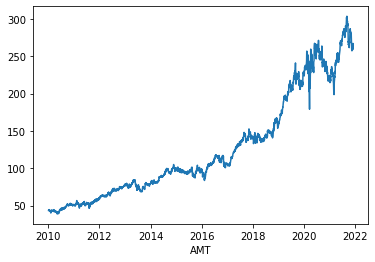

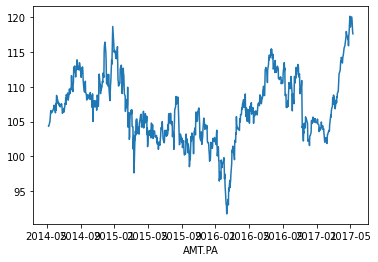

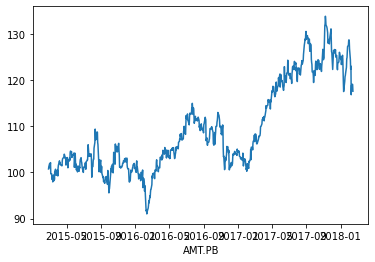

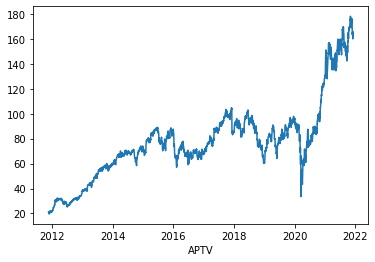

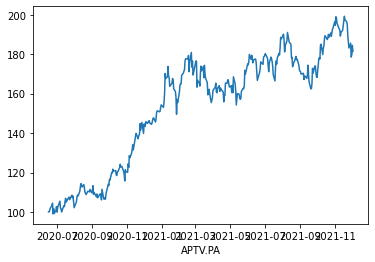

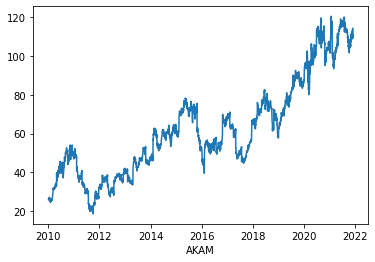

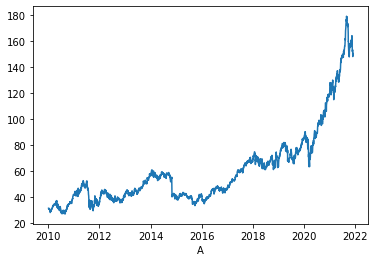

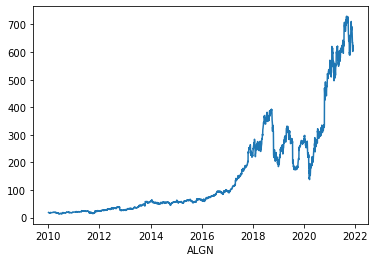

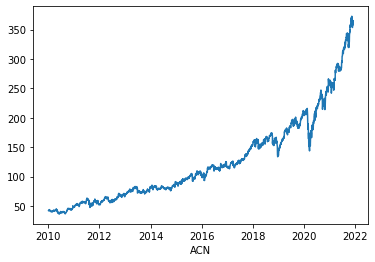

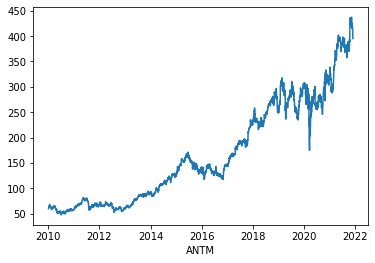

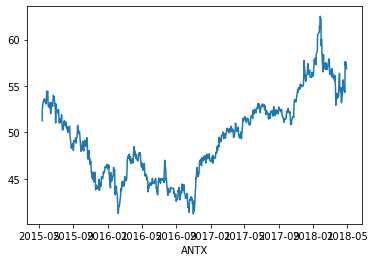

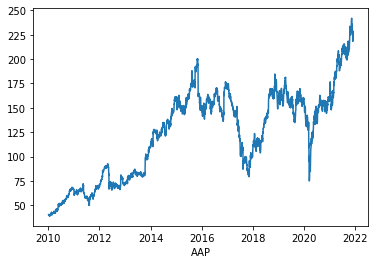

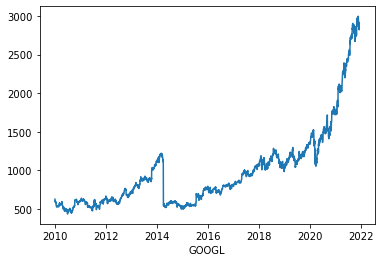

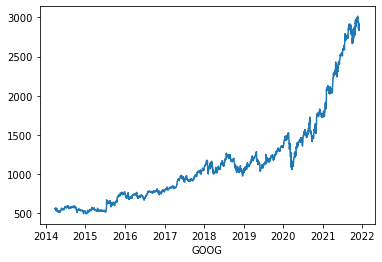

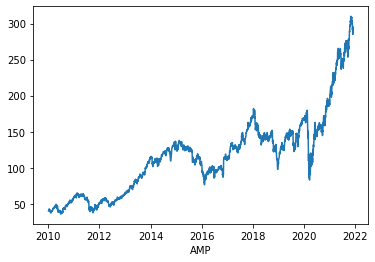

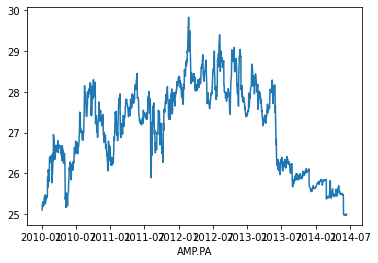

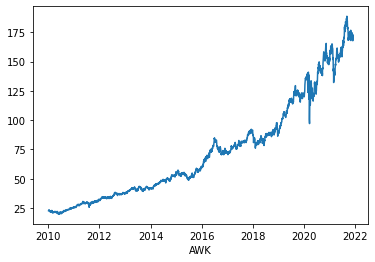

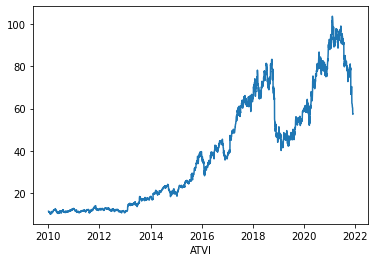

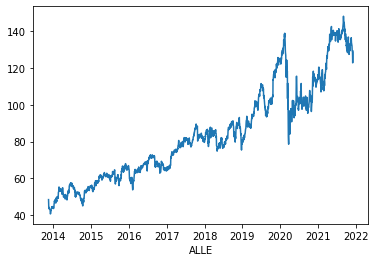

In [16]:
# Closed Price all tics (len(tic)=82)
for tic in df_sp.tic.unique():
    df=df_sp[df_sp["tic"]==tic]
    plt.figure()
    plt.plot(df["datadate"], df["prccd"])
    plt.xlabel(tic)
    plt.show()

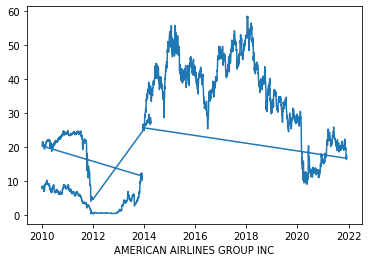

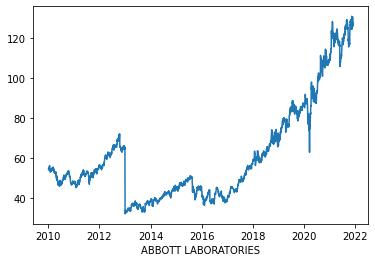

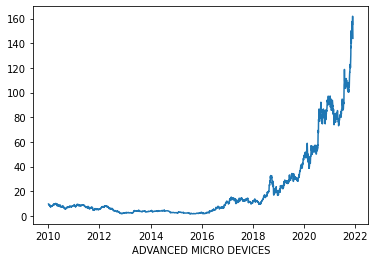

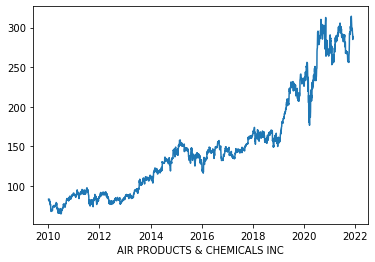

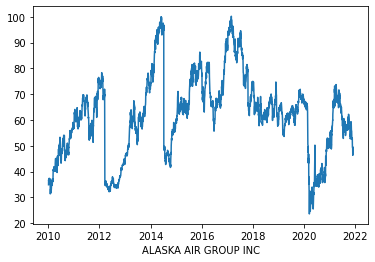

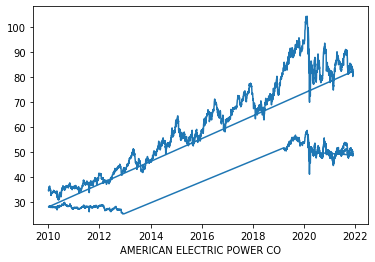

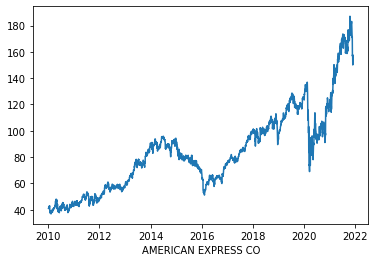

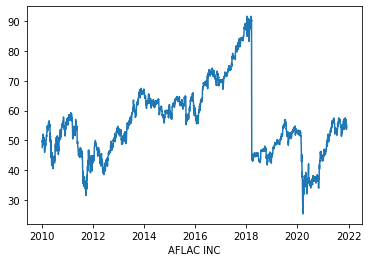

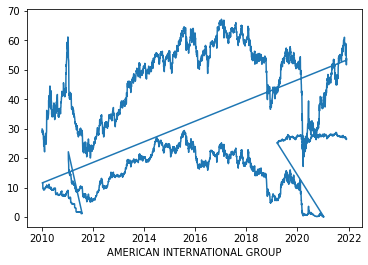

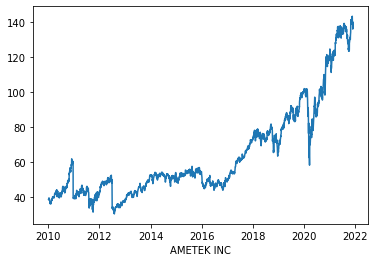

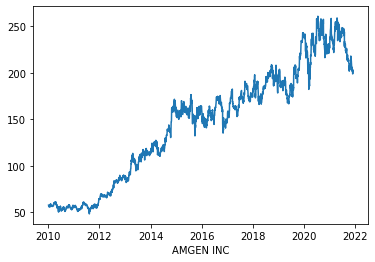

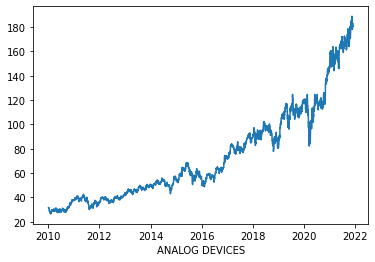

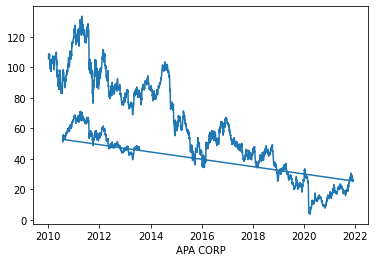

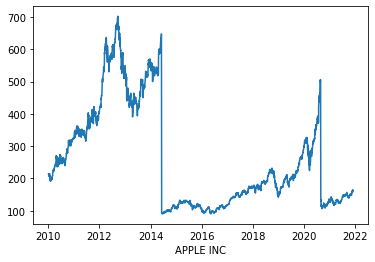

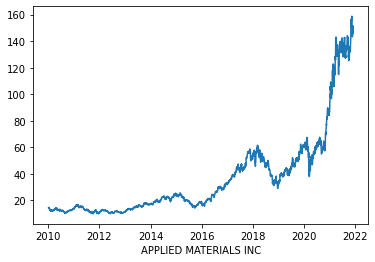

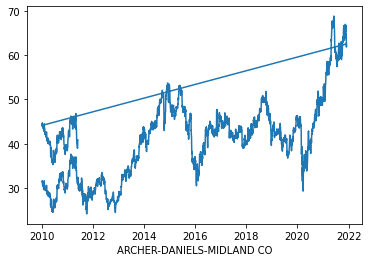

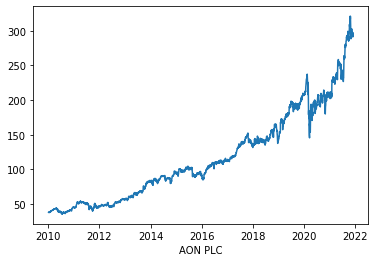

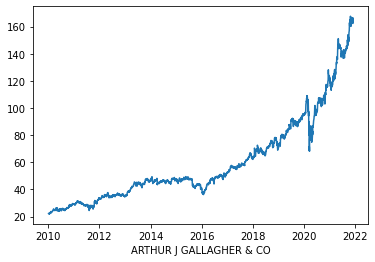

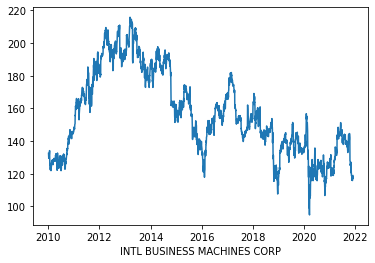

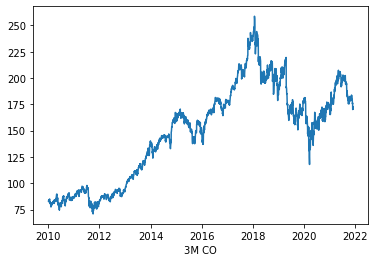

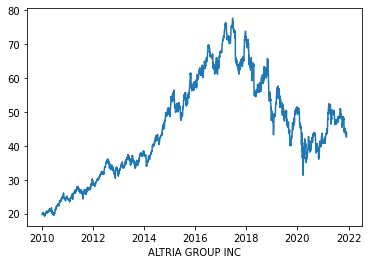

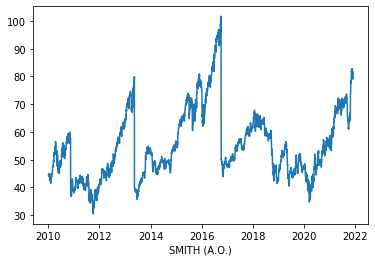

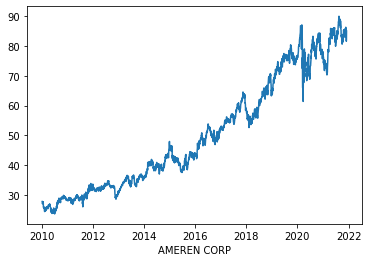

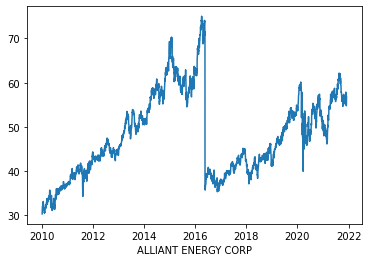

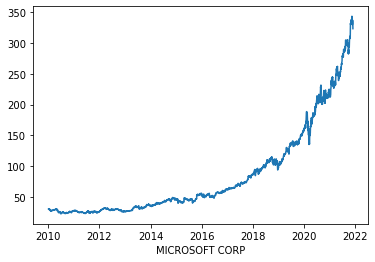

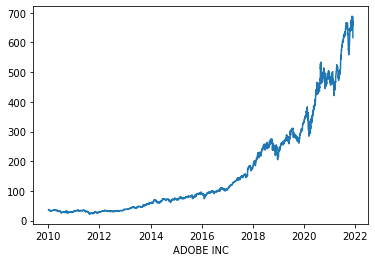

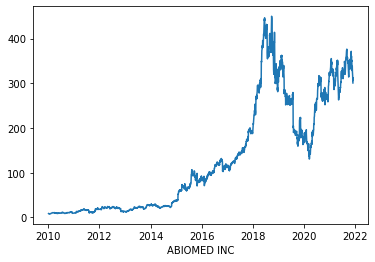

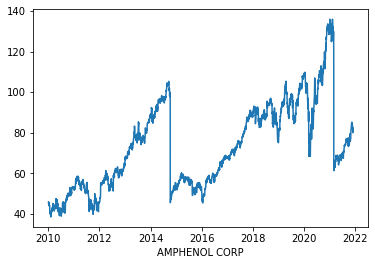

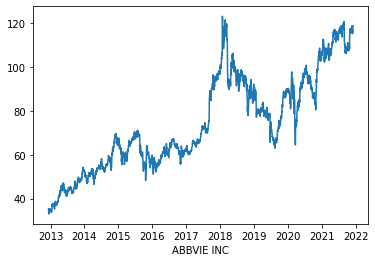

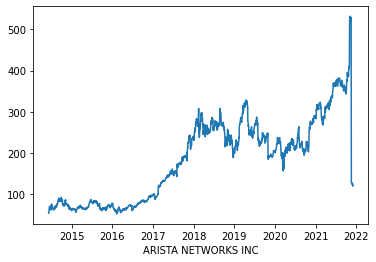

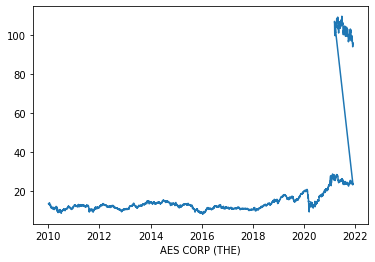

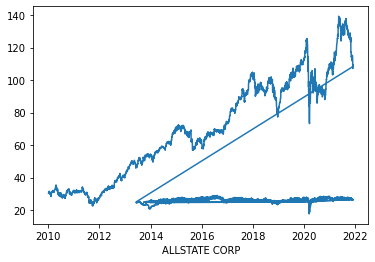

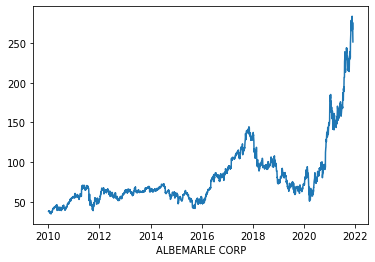

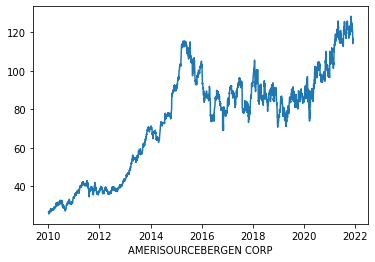

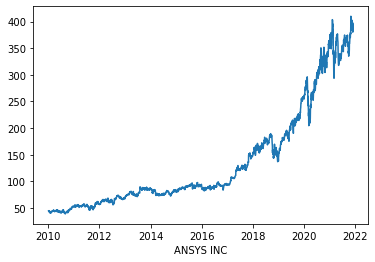

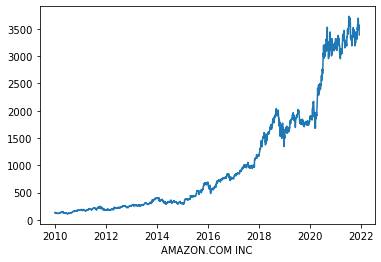

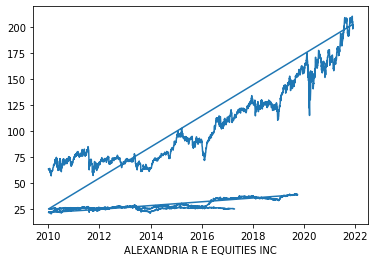

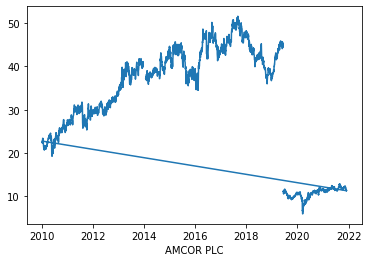

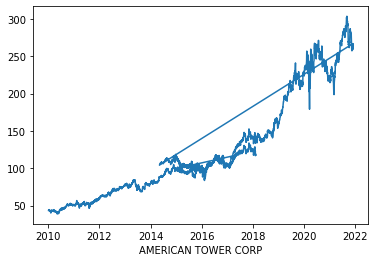

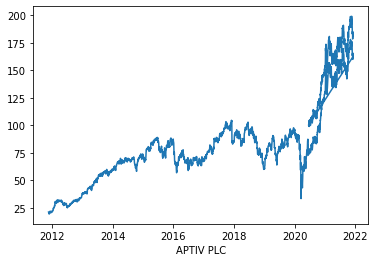

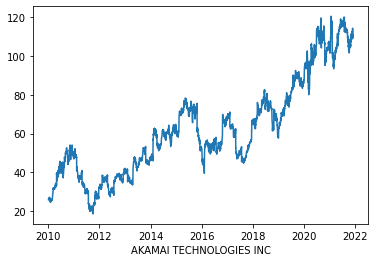

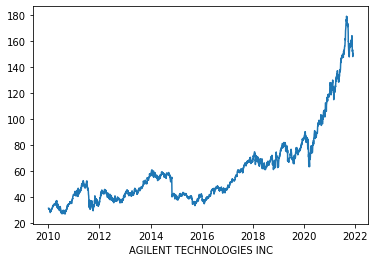

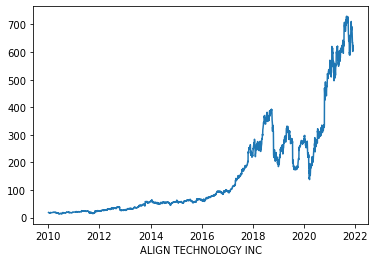

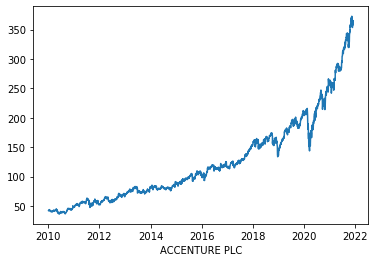

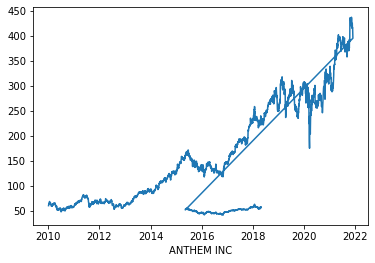

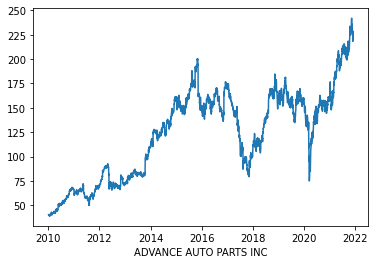

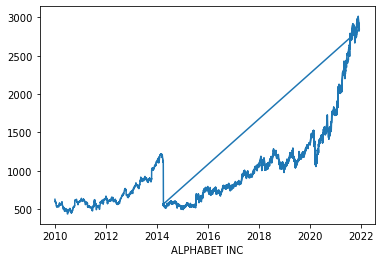

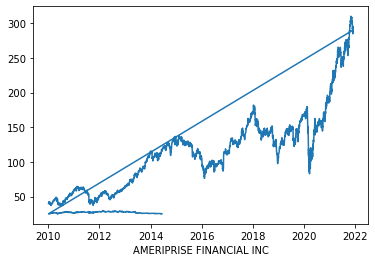

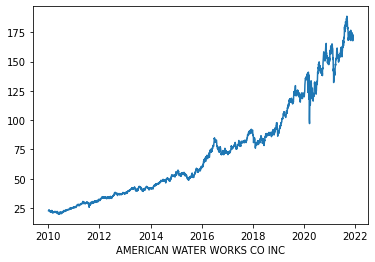

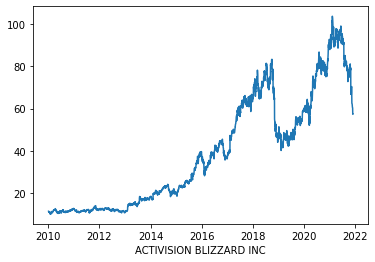

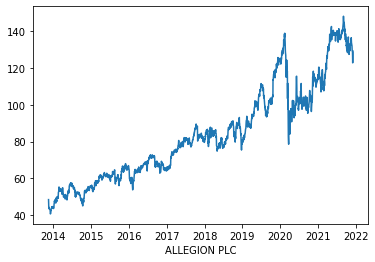

In [18]:
# Closed Price for all conm (len(conm)=51)
for conm in df_sp.conm.unique():
    df=df_sp[df_sp["conm"]==conm]
    plt.figure()
    plt.plot(df["datadate"], df["prccd"])
    plt.xlabel(conm)
    plt.show()

# Abnormalities in the Data...

Potential important Columns for us are: 
- *conm, tic, gvkey, cusip*
- *prccd, prchd, prcod, prcld, prcstd*

1. NaN
    - *tic, conm, cusip, gvkey*:  Seems to be clear, no NaNs
    - All price columns 5 NaN except  **open price 2637 !!!!!
  
2. Vis
    - tic: 5050B is a tic ??? + rest seems clear but not every tic in whole timeframe available
    - conm: Visualisation is chaos + not all in complete timeframe (e.g ABBVIE INC) 